In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.rcParams.update({'font.size': 16})

 Laut Aufgabenblatt sind die Bewegungsgleichungen der gekoppelten Pendel, ausgedrückt in generalisierten Koordinaten und Impulsen, gegeben durch:
 
 \begin{align*}                                                                             
    \dot{\varphi_1} &= \frac{p_1}{m_1l^2}\, ,\\ 
    \dot{\varphi_2} &= \frac{p_2}{m_2l^2}\, ,\\
    \dot{p_1} &= -m_1gl \sin(\varphi_1) - \frac{kh^2}{2}\big[ 2\cos(\varphi_1)
                \left(\sin(\varphi_1) - \sin(\varphi_2)\right) \big]\, ,\\                   
    \dot{p_2} &= -m_2gl \sin(\varphi_2) + \frac{kh^2}{2}\big[ 2\cos(\varphi_2)
                \left(\sin(\varphi_1) - \sin(\varphi_2)\right) \big]\, .                     
\end{align*}

Diese DGL werden nun numerisch gelöst. Das Vorgehen ist dabei analog zum Vorgehen im Notebook `AM_EX8.ipynb`: zunächst implementieren wir die entsprechenden Ableitungen und benutzen dann die von Python zur Verfügung gestellte `odeint`-Methode.

In [111]:
# Konstanten
m1 = 42
m2 = 42
g  = 42
l  = 42
h  = 42-np.sqrt(42)
k  = 0.42

In [112]:
# Koordinaten: phi1,phi2,pphi1,pphi2

# Analog zu den letzen Wochen benötigen wir die Ableitungen der gewählten Koordinaten.
#     Der Vorteil ist, dass der Hamilton'sche Formalismus direkt die Koordinaten liefert
#     und die Ableitungen durch die Bewegungsgleichungen bestimmt sind

def derivs(state,t):
    dydx    = np.zeros_like(state) 
    dydx[0] = state[2]/(m1*l**2)
    dydx[1] = state[3]/(m2*l**2)
    dydx[2] = -m1*g*l*np.sin(state[0])-k*h**2/2*(2*np.cos(state[0]*(np.sin(state[0]-np.sin(state[1])))))
    dydx[3] = -m2*g*l*np.sin(state[1])+k*h**2/2*(2*np.cos(state[1]*(np.sin(state[0]-np.sin(state[1])))))

    return dydx

In [113]:
# Mögliche Anfangsbedingungen
# Probiert zum Beispiel die beiden Normalmoden und eine weitere Möglichkeit aus, was fällt auf?
phi1_0  = 0.42
phi2_0  = -0.42
pphi1_0 = 42
pphi2_0 = -42

In [118]:
# Anfangsbedingungen zusammenfassen und numerisch lösen:
# Analog zu den letzten Wochen.

state0 = [phi1_0,phi2_0,pphi1_0,pphi2_0]
dt = 0.01 

t = np.arange(0.0, 100, dt) 
n_trj = integrate.odeint(derivs, state0, t) 
n_trj

array([[ 4.20000000e-01, -4.20000000e-01,  4.20000000e+01,
        -4.20000000e+01],
       [ 4.19984940e-01, -4.19984940e-01, -2.65146173e+02,
         2.65146173e+02],
       [ 4.19928425e-01, -4.19928425e-01, -5.72268188e+02,
         5.72268188e+02],
       ...,
       [-6.32179815e-02,  6.32179815e-02,  3.11414257e+04,
        -3.11414257e+04],
       [-5.90119481e-02,  5.90119481e-02,  3.11813780e+04,
        -3.11813780e+04],
       [-5.48007321e-02,  5.48007321e-02,  3.12182176e+04,
        -3.12182176e+04]])

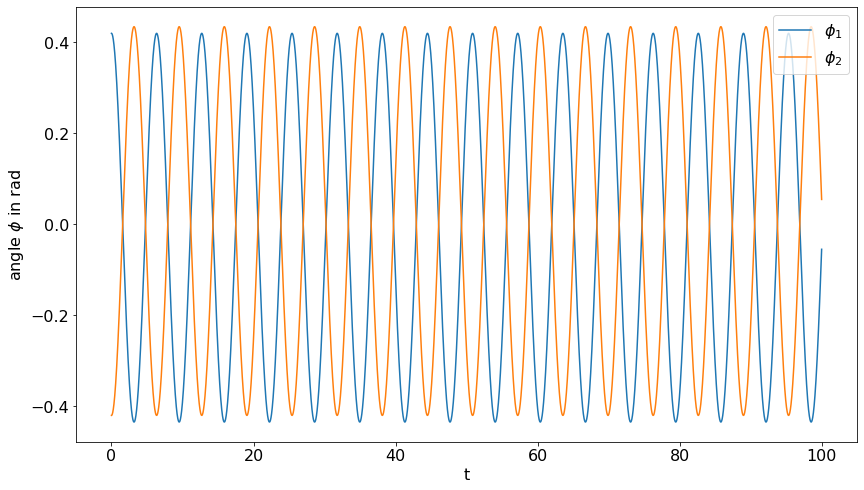

In [119]:
# Plotte die Winkel gegen die Zeit; Beide Winkel in einen Plot
fig,ax = plt.subplots(figsize = (14,8))
ax.plot(t,n_trj[...,0],label = "$\phi_1$")
ax.plot(t,n_trj[...,1],label = "$\phi_2$")
ax.set_xlabel("t")
ax.set_ylabel("angle $\phi$ in rad")
ax.legend(loc = "upper right")

# Bonusaufgabe

Für die Erweiterung müssen zunächst die Bewegungsgleichungen bestimmt werden. Danach ist das Vorgehen analog zu oben.

Für eine Animation kann man sich zum Beispiel am Notebook der letzten Woche orientieren.